# Importaciones

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar Datos Historicos

In [2]:
def get_dataframes():
    dataframes = []
    for file in os.listdir("data"):
        if file.endswith(".csv"):
            dataframes.append(pd.read_csv("data/"+file,delimiter=",", index_col=False))
    return dataframes

# Unir Datos Historicos

In [3]:
datos  = get_dataframes()
DF = pd.concat(datos, axis=0)


# Analisis Descriptivo de Variables 

In [4]:
print(f"{' DESCRIBE ':=^70}")
print(DF.describe(include='all'))
print(f"{' INFORMACION ':=^70}")
print(DF.info())
print(f"{' SHAPE ':=^70}")
print(DF.shape)
print(f"{' head ':=^70}")
print(DF.head())
print(f"{' isnull ':=^70}")
print(DF.isnull().sum())
print(f"{' isna ':=^70}")
print(DF.isna().sum())
print(f"{' unique ':=^70}")
print(DF.nunique())
print(f"{'':=^70}")


============================== DESCRIBE ==============================
                     Tiempo Temperatura  Humedad Dirección del viento  \
count                 32888       32888    32888                32888   
unique                32784         356      152                 3497   
top     2024-05-18 00:14:47           -  127.5 %             6553.5 °   
freq                      2        6629     6629                 6629   

       Velocidad del viento Presión barométrica Precipitación Batería  
count                 32888               32888         32888   32888  
unique                   78                 387           234      29  
top              6553.5 m/s          6553.5 hPa          0 mm   100 %  
freq                   6629                6629         21232   17005  
============================ INFORMACION =============================
<class 'pandas.core.frame.DataFrame'>
Index: 32888 entries, 0 to 8233
Data columns (total 8 columns):
 #   Column                Non

# Limpiar los datos

In [5]:
nuevos_nombres = [
    "Fecha(yyyy-mm-dd)",
    "Hora(hh:mm:ss)", 
    "Temperatura(℃)", 
    "Humedad(%)", 
    "Dirección del viento(°)", 
    "Velocidad del viento(m/s)", 
    "Presión barométrica(hPa)", 
    "Precipitación(mm)", 
    "Batería (%)"
]

if "Tiempo" in DF.columns:
    df = DF["Tiempo"].str.split(" ", expand=True)
    df[0] = pd.to_datetime(df[0], format="%Y-%m-%d", errors="coerce")
    df[1] = pd.to_timedelta(df[1], errors="coerce")
    DF.drop(columns=["Tiempo"], inplace=True)

    df.columns = ["Fecha", "Hora"]


    columnas_numericas = DF.columns

    for columna in columnas_numericas:
        DF[columna] = DF[columna].astype(str).str.replace(r"[^\d.]", "", regex=True)
        DF[columna] = pd.to_numeric(DF[columna], errors="coerce")

    DF = pd.concat([df, DF], axis=1)
    DF.columns = nuevos_nombres
    
DF = DF.drop(columns=["Batería (%)"])
DF = DF.dropna()


DF.to_csv("ITSP_EM_2024_marzo_a_2025_febrero_dataClean.csv", index=False)


# Mostrar datos.

In [6]:
DF


,Fecha(yyyy-mm-dd),Hora(hh:mm:ss),Temperatura(℃),Humedad(%),Dirección del viento(°),Velocidad del viento(m/s),Presión barométrica(hPa),Precipitación(mm)
0,2024-05-18,0 days 00:14:47,29.2,78.5,25.0,0.7,1002.7,0.0
1,2024-05-18,0 days 00:29:46,29.2,79.0,60.9,1.7,1002.7,0.0
2,2024-05-18,0 days 00:44:46,29.1,79.5,74.9,2.3,1002.5,0.0
3,2024-05-18,0 days 00:59:46,29.0,79.5,19.9,1.3,1002.3,0.0
4,2024-05-18,0 days 01:14:46,29.0,80.0,53.3,0.9,1002.4,0.0
...,...,...,...,...,...,...,...,...
8229,2025-02-14,0 days 22:51:36,19.2,85.5,99.9,1.7,1013.6,0.0
8230,2025-02-14,0 days 23:06:35,19.3,86.0,66.4,1.5,1013.7,0.0
8231,2025-02-14,0 days 23:21:35,19.4,86.0,96.3,1.5,1013.6,0.0
8232,2025-02-14,0 days 23:36:35,19.4,85.5,72.6,1.6,1013.5,0.0


# Analisis Descriptivo de Variables (datos limpios)

In [7]:
print(f"{' DESCRIBE ':=^70}")
print(DF.describe(include='all'))
print(f"{' INFORMACION ':=^70}")
print(DF.info())
print(f"{' SHAPE ':=^70}")
print(DF.shape)
print(f"{' head ':=^70}")
print(DF.head())
print(f"{' isnull ':=^70}")
print(DF.isnull().sum())
print(f"{' isna ':=^70}")
print(DF.isna().sum())
print(f"{' unique ':=^70}")
print(DF.nunique())
print(f"{'':=^70}")



============================== DESCRIBE ==============================
                   Fecha(yyyy-mm-dd)             Hora(hh:mm:ss)  \
count                          26259                      26259   
mean   2024-07-18 23:58:01.549183488  0 days 11:37:30.491945618   
min              2024-02-20 00:00:00            0 days 00:00:55   
25%              2024-04-08 00:00:00     0 days 05:17:17.500000   
50%              2024-06-06 00:00:00            0 days 10:58:33   
75%              2024-11-03 00:00:00            0 days 18:08:34   
max              2025-02-14 00:00:00            0 days 23:59:57   
std                              NaN  0 days 07:10:46.281395107   

       Temperatura(℃)    Humedad(%)  Dirección del viento(°)  \
count    26259.000000  26259.000000             26259.000000   
mean        25.656742     74.494383               134.409639   
min          5.000000     19.500000                 0.000000   
25%         21.800000     62.500000                73.900000   
50%  

# Generar Graficos de las Columnas Numericas

Text(0.5, 1.0, 'Temperatura entre 15:00 y 16:00 del mes de abril de 2024')

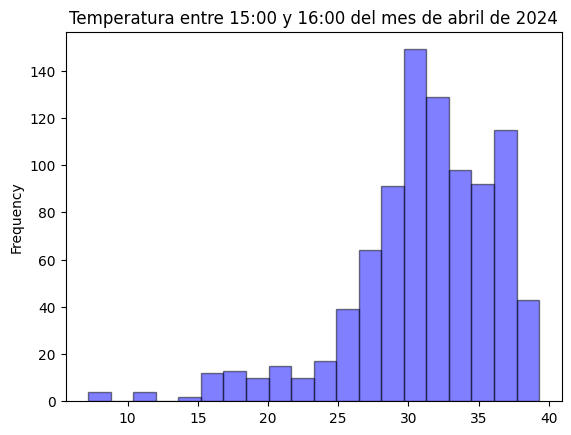

In [38]:
DF[(DF["Hora(hh:mm:ss)"] > "15:00:00") & (DF["Hora(hh:mm:ss)"] < "16:00:00") ]["Temperatura(℃)"].plot(
    kind="hist", bins=20, alpha=0.5, color="blue", edgecolor="black").set_title("Temperatura entre 15:00 y 16:00 del mes de abril de 2024")

<Axes: ylabel='Frequency'>

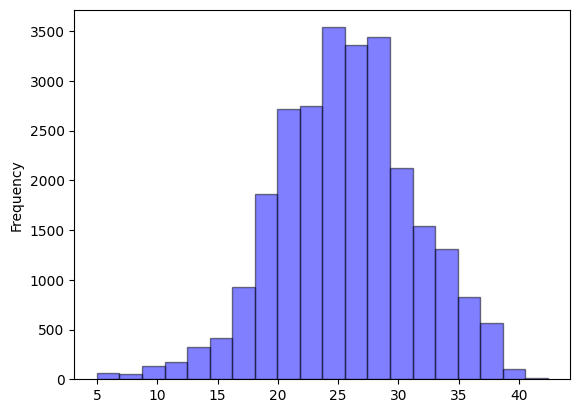

In [46]:
DF["Temperatura(℃)"].plot(
    kind="hist", bins=20, alpha=0.5, color="blue", edgecolor="black")


In [9]:
def Generar_grafico(titulo):
    ARRAY = np.array(DF[titulo])
    ARRAY = ARRAY[~np.isnan(ARRAY)] 

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(ARRAY, bins=30, kde=True, color='skyblue')
    plt.axvline(np.mean(ARRAY), color='red', linestyle='dashed', linewidth=2, label=f'{titulo} Promedio: {np.mean(ARRAY):.2f}')  
    plt.axvline(np.median(ARRAY), color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {np.median(ARRAY):.2f}') 
    plt.xlabel(titulo)
    plt.ylabel("Frecuencia")
    plt.title(f"Histograma de {titulo}")
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.boxplot(x=ARRAY, color='lightcoral')
    plt.xlabel(titulo)
    plt.title(f"Boxplot de {titulo}")

    plt.tight_layout()
    plt.show()

    

    ARRAY = np.array(DF[titulo])
    ARRAY = ARRAY[~np.isnan(ARRAY)] 

# Medidas de tendencia central
    print(f"{' Medidas de tendencia Central ':=^50}")
    print(f"{'Promedio':<25} | {np.mean(ARRAY):<25}")
    print(f"{'Mediana':<25} | {np.median(ARRAY):<25}")
    print(f"{'Moda':<25} | {np.argmax(np.bincount(ARRAY.astype(int))):<25}")
    print()

    # Medidas de dispersión
    print(f"{' Medidas de dispersión ':=^50}")
    print(f"{'Desviación Estándar':<25} | {np.std(ARRAY):<25}")
    print(f"{'Varianza':<25} | {np.var(ARRAY):<25}")
    print(f"{'Rango':<25} | {np.max(ARRAY) - np.min(ARRAY):<25}")
    print()

    # Medidas de posición
    print(f"{' Medidas de posición ':=^50}")
    print(f"{'Percentil 0':<25} | {np.percentile(ARRAY, 0):<25}")
    print(f"{'Percentil 25':<25} | {np.percentile(ARRAY, 25):<25}")
    print(f"{'Percentil 50':<25} | {np.percentile(ARRAY, 25):<25}")
    print(f"{'Percentil 75':<25} | {np.percentile(ARRAY, 75):<25}")
    print(f"{'Percentil 80':<25} | {np.percentile(ARRAY, 80):<25}")
    print(f"{'Percentil 99':<25} | {np.percentile(ARRAY, 99):<25}")
    print(f"{'Percentil 100':<25} | {np.percentile(ARRAY, 100):<25}")
    print()

    # Información adicional
    print(f"{' Información adicional ':=^50}")
    print(f"{'Total de valores':<25} | {np.count_nonzero(ARRAY):<25}")
    print(f"{'Valor Máximo':<25} | {np.max(ARRAY):<25}")
    print(f"{'Valor Mínimo':<25} | {np.min(ARRAY):<25}")
    print()


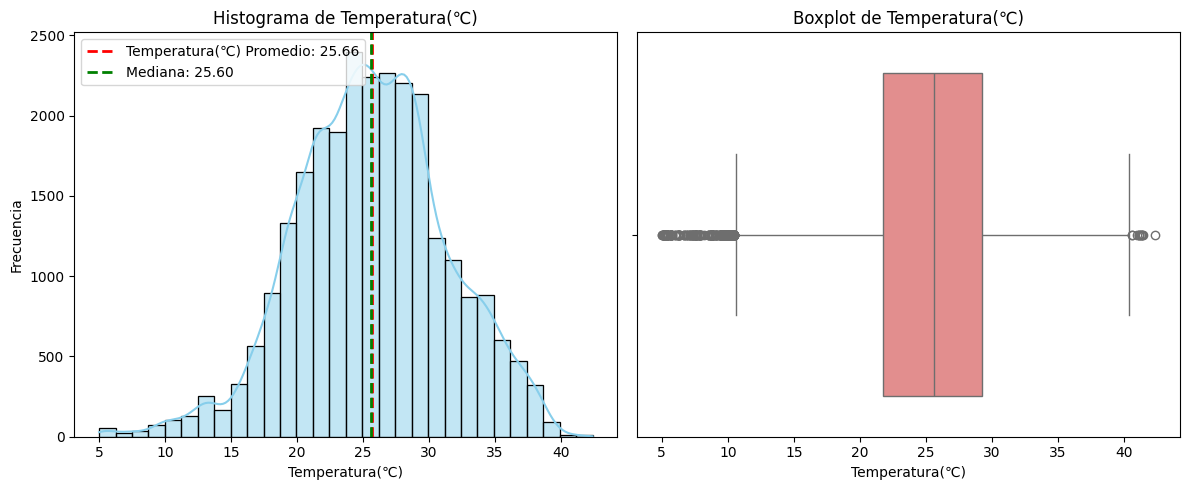

========== Medidas de tendencia Central ==========
Promedio                  | 25.656742450207545       
Mediana                   | 25.6                     
Moda                      | 25                       

============= Medidas de dispersión ==============
Desviación Estándar       | 5.7007270017714236       
Varianza                  | 32.4982883487258         
Rango                     | 37.4                     

============== Medidas de posición ===============
Percentil 0               | 5.0                      
Percentil 25              | 21.8                     
Percentil 50              | 21.8                     
Percentil 75              | 29.3                     
Percentil 80              | 30.3                     
Percentil 99              | 38.0                     
Percentil 100             | 42.4                     

============= Información adicional ==============
Total de valores          | 26259                    
Valor Máximo              | 42.4     

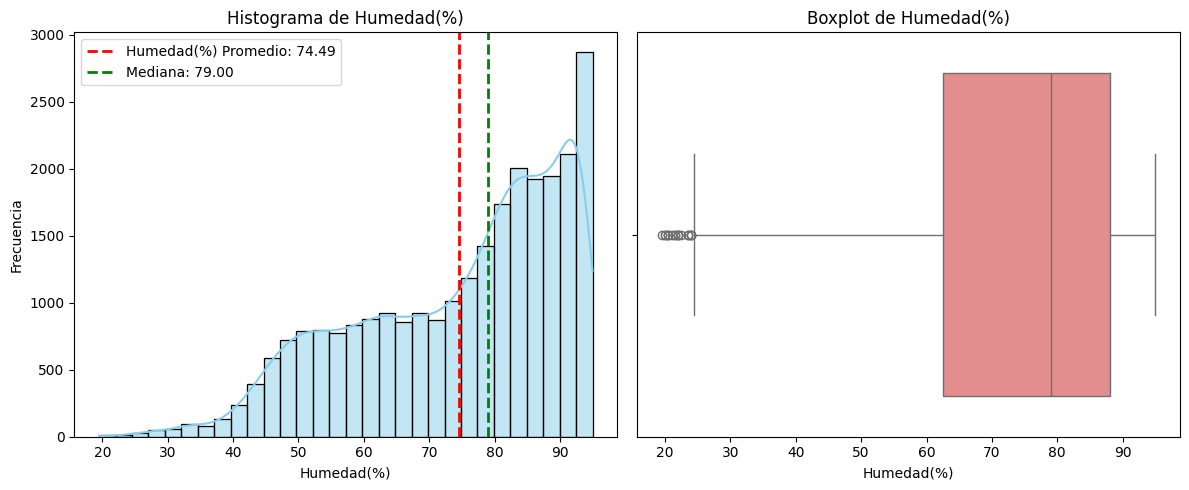

========== Medidas de tendencia Central ==========
Promedio                  | 74.49438287825127        
Mediana                   | 79.0                     
Moda                      | 93                       

============= Medidas de dispersión ==============
Desviación Estándar       | 15.800069489553843       
Varianza                  | 249.64219587473028       
Rango                     | 75.5                     

============== Medidas de posición ===============
Percentil 0               | 19.5                     
Percentil 25              | 62.5                     
Percentil 50              | 62.5                     
Percentil 75              | 88.0                     
Percentil 80              | 89.5                     
Percentil 99              | 94.5                     
Percentil 100             | 95.0                     

============= Información adicional ==============
Total de valores          | 26259                    
Valor Máximo              | 95.0     

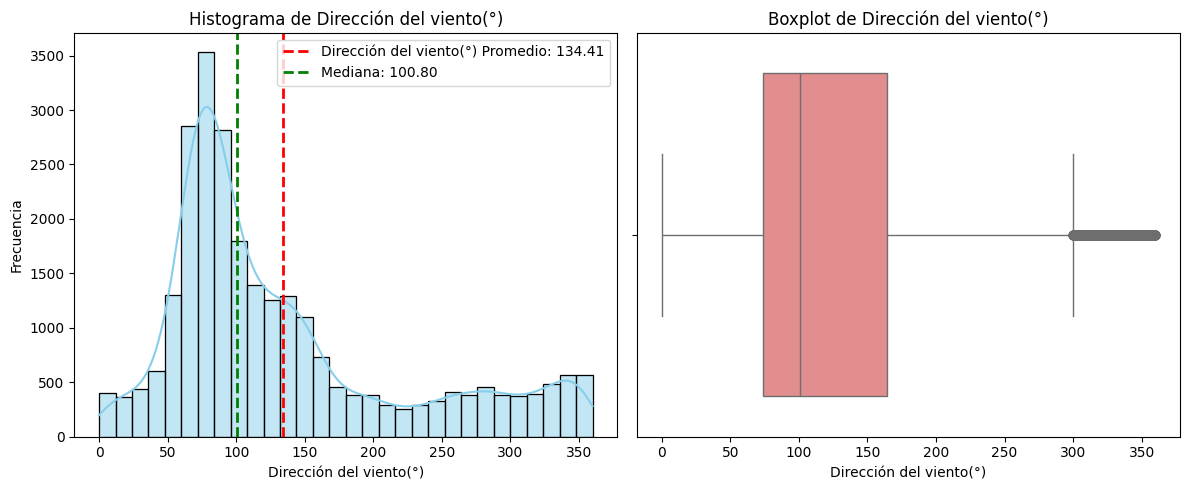

========== Medidas de tendencia Central ==========
Promedio                  | 134.40963860009902       
Mediana                   | 100.8                    
Moda                      | 73                       

============= Medidas de dispersión ==============
Desviación Estándar       | 88.28962916456015        
Varianza                  | 7795.058618015551        
Rango                     | 359.9                    

============== Medidas de posición ===============
Percentil 0               | 0.0                      
Percentil 25              | 73.9                     
Percentil 50              | 73.9                     
Percentil 75              | 164.14999999999998       
Percentil 80              | 201.2                    
Percentil 99              | 353.5                    
Percentil 100             | 359.9                    

============= Información adicional ==============
Total de valores          | 26255                    
Valor Máximo              | 359.9    

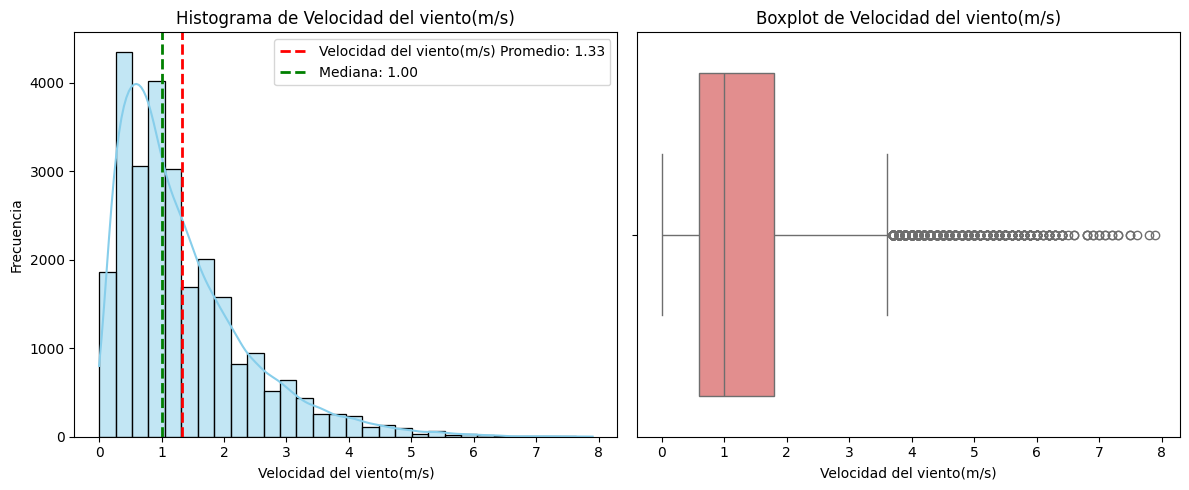

========== Medidas de tendencia Central ==========
Promedio                  | 1.3261510339312235       
Mediana                   | 1.0                      
Moda                      | 0                        

============= Medidas de dispersión ==============
Desviación Estándar       | 1.0403217755040095       
Varianza                  | 1.0822693965878147       
Rango                     | 7.9                      

============== Medidas de posición ===============
Percentil 0               | 0.0                      
Percentil 25              | 0.6                      
Percentil 50              | 0.6                      
Percentil 75              | 1.8                      
Percentil 80              | 2.0                      
Percentil 99              | 4.9                      
Percentil 100             | 7.9                      

============= Información adicional ==============
Total de valores          | 26222                    
Valor Máximo              | 7.9      

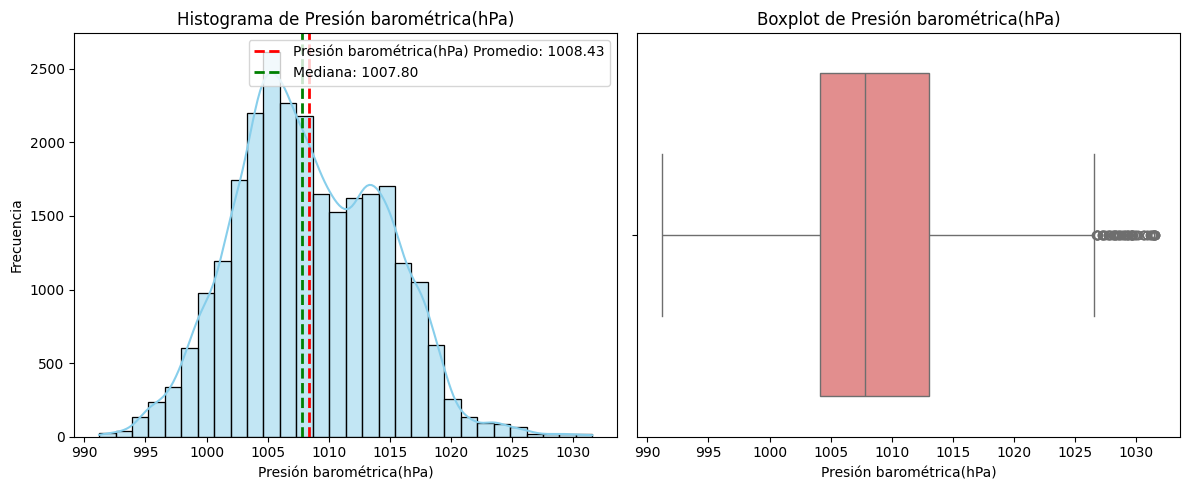

========== Medidas de tendencia Central ==========
Promedio                  | 1008.4304619368597       
Mediana                   | 1007.8                   
Moda                      | 1005                     

============= Medidas de dispersión ==============
Desviación Estándar       | 6.016094613450297        
Varianza                  | 36.19339439798568        
Rango                     | 40.399999999999864       

============== Medidas de posición ===============
Percentil 0               | 991.2                    
Percentil 25              | 1004.1                   
Percentil 50              | 1004.1                   
Percentil 75              | 1013.1                   
Percentil 80              | 1014.1                   
Percentil 99              | 1023.1                   
Percentil 100             | 1031.6                   

============= Información adicional ==============
Total de valores          | 26259                    
Valor Máximo              | 1031.6   

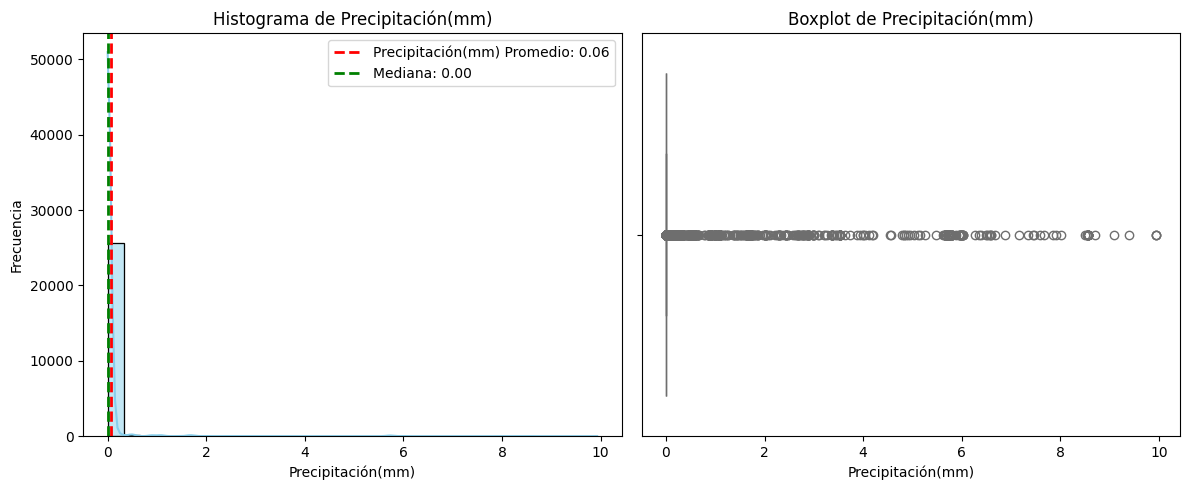

========== Medidas de tendencia Central ==========
Promedio                  | 0.06084580524772459      
Mediana                   | 0.0                      
Moda                      | 0                        

============= Medidas de dispersión ==============
Desviación Estándar       | 0.4962381933273115       
Varianza                  | 0.24625234451675418      
Rango                     | 9.93                     

============== Medidas de posición ===============
Percentil 0               | 0.0                      
Percentil 25              | 0.0                      
Percentil 50              | 0.0                      
Percentil 75              | 0.0                      
Percentil 80              | 0.0                      
Percentil 99              | 1.69                     
Percentil 100             | 9.93                     

============= Información adicional ==============
Total de valores          | 5027                     
Valor Máximo              | 9.93     

In [10]:
for columna in DF.columns[2:]:
    Generar_grafico(columna)


# Correlacion de Variables

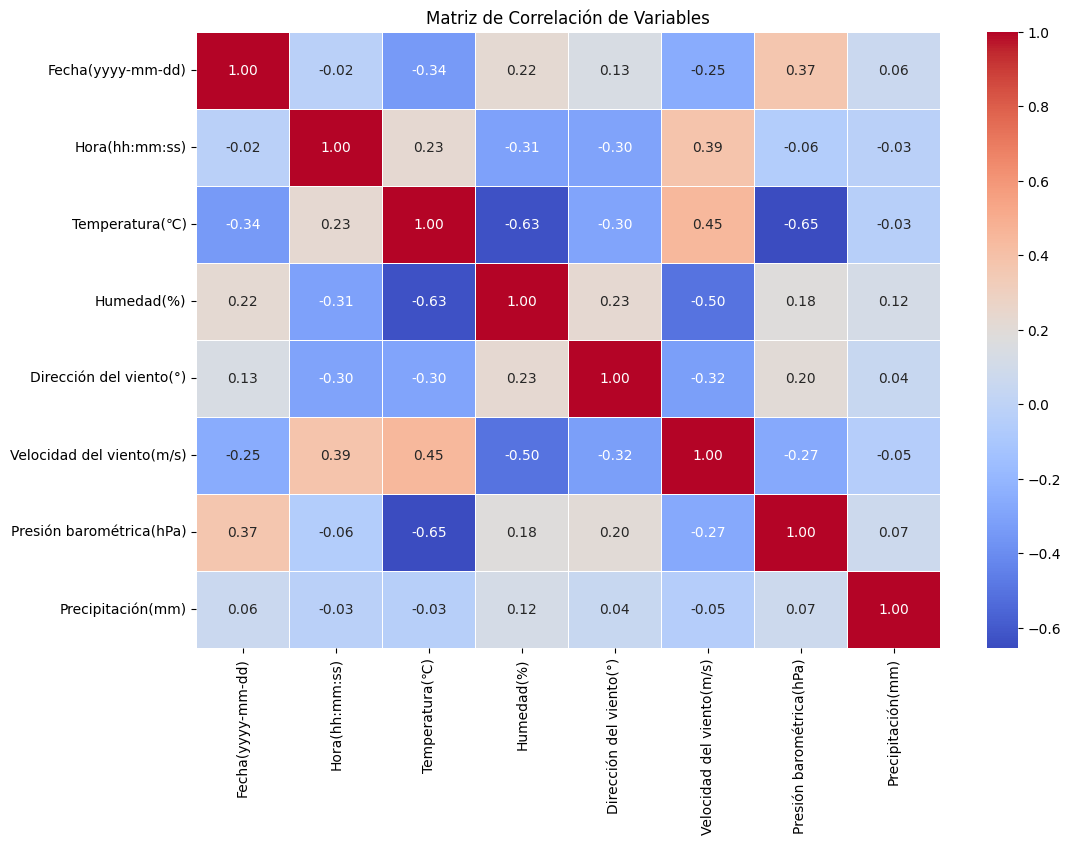

In [11]:
correlation_matrix = DF.corr()

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Personalizar el gráfico
plt.title('Matriz de Correlación de Variables')
plt.show()